# Gradients of models

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys

<ErrorbarContainer object of 3 artists>

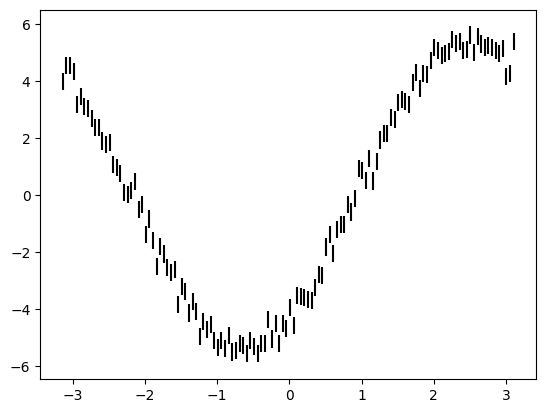

In [200]:
phi = np.arange(-np.pi, np.pi, 0.05)
y = 3.1293*np.sin(phi) + -4.294*np.cos(phi) + np.random.normal(0, 0.3, size=len(phi))
ye = np.ones(len(phi)) * 0.3

plt.errorbar(phi, y, ye, c='k', ls='')

In [201]:
from lamatrix import Sinusoid

In [202]:
model = Sinusoid('phi')
model.fit(phi=phi, data=y, errors=ye)

In [203]:
model.posteriors.mean

array([ 3.17886924, -4.34213633])

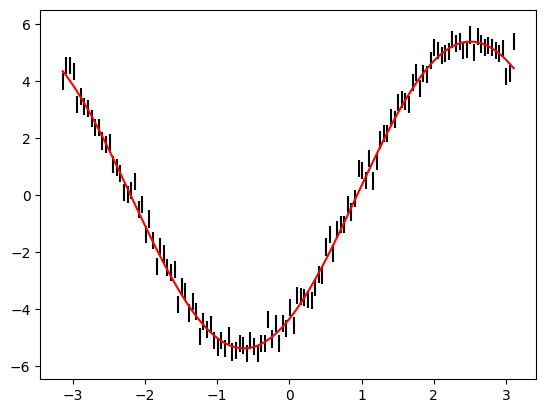

In [204]:
plt.errorbar(phi, y, ye, c='k', ls='')
plt.plot(phi, model.evaluate(phi=phi), c='r')

In [205]:
dmodel = model.to_gradient()

In [206]:
dmodel

dSinusoid(phi)[n, 1]

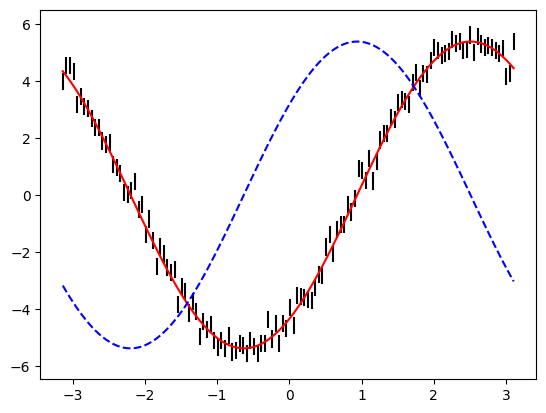

In [207]:
plt.errorbar(phi, y, ye, c='k', ls='')
plt.plot(phi, model.evaluate(phi=phi), c='r')
plt.plot(phi, dmodel.design_matrix(phi=phi)[:, 0], c='b', ls='--')

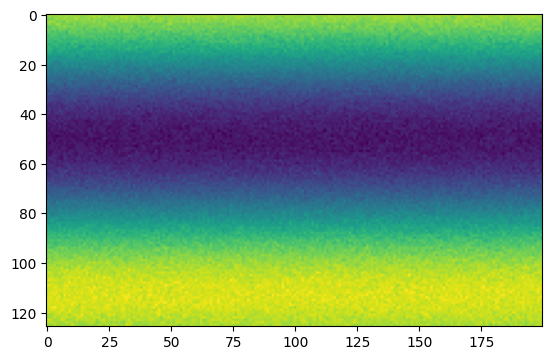

In [213]:
phi = np.arange(-np.pi, np.pi, 0.05)[:, None] * np.ones(200)
y = 3.1293*np.sin(phi) + -4.294*np.cos(phi) + np.random.normal(0, 0.3, size=phi.shape)
ye = np.ones(phi.shape) * 0.3

plt.imshow(y, vmin=-6, vmax=6)

In [214]:
model = Sinusoid('phi')
model.fit(phi=phi, data=y, errors=ye)

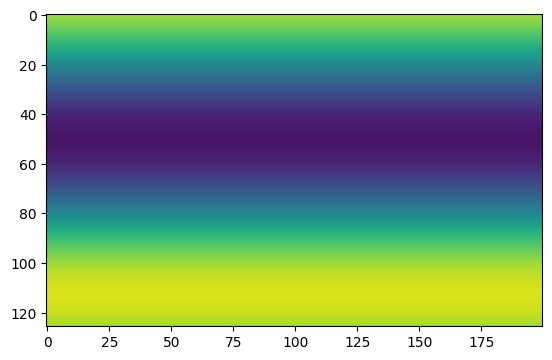

In [215]:
plt.imshow(model.evaluate(phi=phi), vmin=-6, vmax=6)

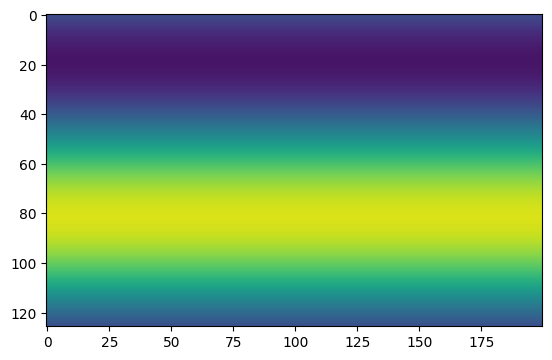

In [216]:
plt.imshow(model.to_gradient().design_matrix(phi=phi)[:, :, 0], vmin=-6, vmax=6)

In [309]:
x = np.arange(-5, 5, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)

z = np.random.normal(size=len(x))
z = np.convolve(z, np.ones(300), mode='same')

Z = np.interp(x - (0.03*y)[:, None], x, z)

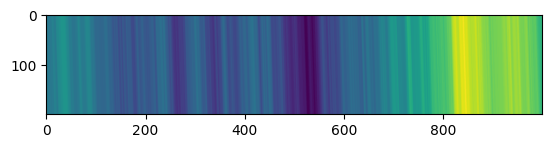

In [310]:
plt.imshow(Z)

In [311]:
from lamatrix import Spline

In [312]:
knot_spacing = 0.05
order = 3
knots = np.arange(-5 - knot_spacing * (order - 1), 5 + (knot_spacing * (order - 1)) + knot_spacing, knot_spacing)

In [355]:
spline = Spline('x', knots=knots, order=order)

In [356]:
spline.fit(x=X, data=Z)

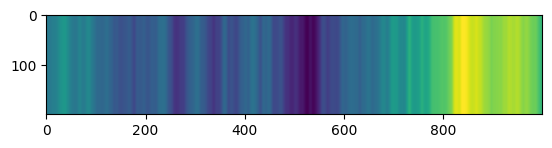

In [357]:
plt.imshow(spline.evaluate(x=X))

In [358]:
dspline = spline.to_gradient()

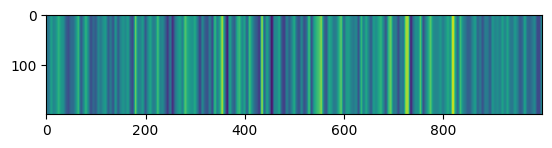

In [359]:
plt.imshow(dspline.design_matrix(x=X).dot([1]))

In [360]:
from lamatrix import Constant, Polynomial

In [362]:
model = spline + (Polynomial('y', order=1) * dspline)

In [363]:
model

JointModel
	Spline(x)[n, 202]
	CrosstermModel(y, x)[n, 1]

In [364]:
model.fit(x=X, y=Y, data=Z)

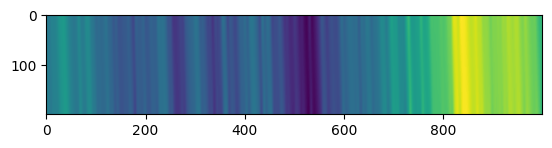

In [366]:
plt.imshow(model.evaluate(x=X, y=Y))

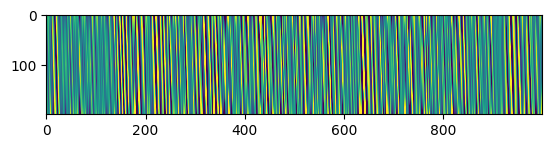

In [367]:
plt.imshow(Z - model.evaluate(x=X, y=Y), vmin=-1, vmax=1)

In [368]:
model[1].posteriors.mean

array([-0.03102141])

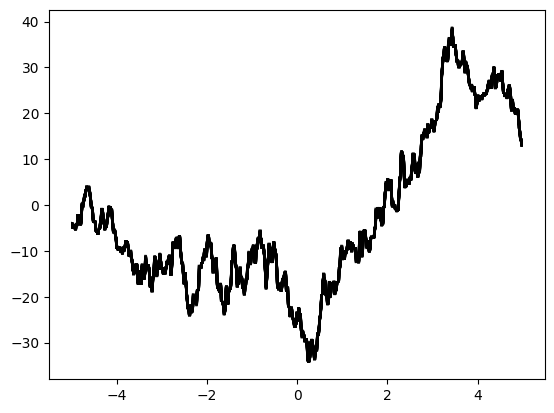

In [369]:
plt.plot(X.T, Z.T, lw=0.1, c='k');

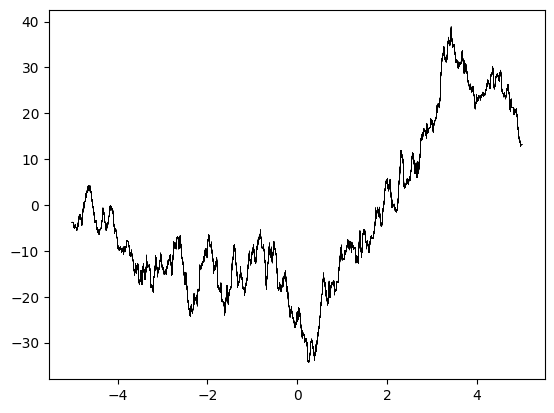

In [370]:
shifted_X = (Y * model[1].posteriors.mean[0])
plt.plot(X.T + shifted_X.T, Z.T, lw=0.1, c='k');

In [372]:
spline.fit(x=X + shifted_X, data=Z)

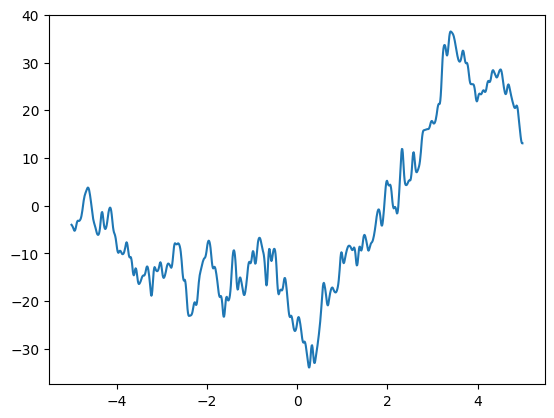

In [373]:
plt.plot(x, spline.evaluate(x=x))

In [396]:
shifted_X = X*0

for count in range(3):
    spline = Spline('x', order=order, knots=knots)
    poly = Polynomial('y', order=1)
    
    model = spline
    model.fit(x=X + shifted_X, data=Z)
    
    model = spline + spline.to_gradient() * poly
    model.fit(x=X, y=Y, data=Z)
    shifted_X = (Y * model[1].posteriors.mean[0])

array([-0.03102141])